## **공공조달 데이터분석**

### **데이터 불러오기**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [66]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import warnings
warnings.filterwarnings(action='ignore')

def show_hist(df, columns):
    for column in columns:
        print('column name:', column)
        fig, axs = plt.subplots(figsize=(12,4), nrows=1, ncols=2 ,squeeze=False)
        sns.boxplot(df[column], ax=axs[0][0])
        sns.distplot(df[column], ax=axs[0][1])

def cut_outlier(df, columns):
    df=df.copy()
    for column in columns:
        q1=df[column].quantile(.25)
        q3=df[column].quantile(.75)
        iqr=q3-q1
        low=q1-1.5*iqr
        high=q3+1.5*iqr
        df.loc[df[column]<low, column]=low
        df.loc[df[column]>high, column]=high
    return df

def corr_p(df):
    col_len = len(df.columns)
    p_df = pd.DataFrame(np.zeros((col_len,col_len)),columns=df.columns, index=df.columns)
    for idx in range(len(p_df.index)):
      for col in range(len(p_df.columns)):
            p_df.iloc[idx,col] = round(stats.pearsonr(df[column_names[idx]], df[column_names[col]])[1],2)
    return p_df

def show_heatmap(df1, df2, figx, figy):
    mask1 = np.zeros_like(df1)
    mask2 = np.zeros_like(df2)
    mask1[np.triu_indices_from(mask1)] = True
    mask2[np.triu_indices_from(mask2)] = True
    fig, axs = plt.subplots(figsize=(figx,figy), nrows=1,ncols=2, squeeze=False)
    sns.heatmap(df1, annot=True,mask=mask1, cmap='coolwarm', ax=axs[0][0])
    sns.heatmap(df2, annot=True, mask=mask2, cmap='coolwarm', ax=axs[0][1])

In [67]:
# 데이터프레임 불러오기
data = pd.read_csv('/content/drive/MyDrive/Contest/공공조달/dataset/150_data_2.csv', index_col = 0)
data.head(10)

,녹색제품실적(건수),온실가스 배출량,용수사용량(ton),에너지사용량(TOE),폐기물발생량(ton),녹색제품 구매액(백만),에너지이용합리화법관련제품(건수),온실가스 감축률,여성임원수,장애인생산품구매비중,중소기업제품사용(건수),장애인채용현황(명),환경 유관부서 수,기부실적(백만원),총 직원수,여성직원수,감사임원수,여성직원비율,실적(백만명)
공공기관,,,,,,,,,,,,,,,,,,,
가축위생방역지원본부,19.0,2074.0,932.00,80.20,4.95,18.0,9.0,3.27,2.0,0.0,16.0,0.0,1.0,46.65,1275.0,436.43,1.0,0.34,10391.88
건강보험심사평가원,89.0,8987.0,65829.00,4107.57,186.40,3200.0,14.0,36.38,4.0,0.0,40.0,0.0,3.0,595.59,3971.0,2823.75,1.0,0.71,76878.46
건설근로자공제회,96.0,54.0,1226.25,64.85,13.88,70.0,38.0,15.63,4.0,0.0,46.0,0.0,2.0,21.18,218.5,83.50,1.0,0.38,1547.88
게임물관리위원회,11.0,11.0,NaN,NaN,NaN,62.0,8.0,56.00,3.0,11.0,9.0,0.0,NaN,1.77,99.0,30.00,1.0,0.30,4321.18
경제인문사회연구회,34.0,18.0,NaN,NaN,NaN,67.0,21.0,50.00,3.0,0.0,22.0,0.0,NaN,0.00,98.0,39.00,16.0,0.40,3825.08
고용노동부,438.0,12397.0,26289.00,971.10,123.40,1625.0,259.0,10.34,5.0,2.0,209.0,4.0,3.0,NaN,NaN,NaN,NaN,NaN,196782.57
공무원연금공단,145.0,938.0,7513.00,322.26,29.51,375.0,69.0,30.52,2.0,0.0,75.0,1.0,5.0,37.27,683.0,323.56,1.0,0.47,65349.03
과학기술정책연구원,4.0,3.0,2054.00,195.21,2.51,0.0,NaN,76.92,2.0,0.0,NaN,0.0,1.0,0.00,167.0,79.00,1.0,0.47,992.77
관세청,690.0,9825.0,5285.22,257.36,26.74,3219.0,86.0,19.43,0.0,0.0,509.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,92803.41


In [68]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 149 entries, 가축위생방역지원본부 to 환경부
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   녹색제품실적(건수)         146 non-null    float64
 1   온실가스 배출량           136 non-null    float64
 2   용수사용량(ton)         139 non-null    float64
 3   에너지사용량(TOE)        139 non-null    float64
 4   폐기물발생량(ton)        139 non-null    float64
 5   녹색제품 구매액(백만)       141 non-null    float64
 6   에너지이용합리화법관련제품(건수)  142 non-null    float64
 7   온실가스 감축률           136 non-null    float64
 8   여성임원수              149 non-null    float64
 9   장애인생산품구매비중         148 non-null    float64
 10  중소기업제품사용(건수)       139 non-null    float64
 11  장애인채용현황(명)         149 non-null    float64
 12  환경 유관부서 수          139 non-null    float64
 13  기부실적(백만원)          115 non-null    float64
 14  총 직원수              133 non-null    float64
 15  여성직원수              133 non-null    float64
 16  감사임원수              133

In [69]:
# 결측치 확인
data.isna().sum()

녹색제품실적(건수)            3
온실가스 배출량             13
용수사용량(ton)           10
에너지사용량(TOE)          10
폐기물발생량(ton)          10
녹색제품 구매액(백만)          8
에너지이용합리화법관련제품(건수)     7
온실가스 감축률             13
여성임원수                 0
장애인생산품구매비중            1
중소기업제품사용(건수)         10
장애인채용현황(명)            0
환경 유관부서 수            10
기부실적(백만원)            34
총 직원수                16
여성직원수                16
감사임원수                16
여성직원비율               16
실적(백만명)               7
dtype: int64

In [70]:
# 결측치 평균으로 채우기
data.fillna(data.mean(),inplace=True)

In [71]:
# 결측치 확인
data.isna().sum()

녹색제품실적(건수)           0
온실가스 배출량             0
용수사용량(ton)           0
에너지사용량(TOE)          0
폐기물발생량(ton)          0
녹색제품 구매액(백만)         0
에너지이용합리화법관련제품(건수)    0
온실가스 감축률             0
여성임원수                0
장애인생산품구매비중           0
중소기업제품사용(건수)         0
장애인채용현황(명)           0
환경 유관부서 수            0
기부실적(백만원)            0
총 직원수                0
여성직원수                0
감사임원수                0
여성직원비율               0
실적(백만명)              0
dtype: int64

In [72]:
# 컬럼명 변경
data.columns = ['Green_CNT','Gas','Water','Energy','Waste','Green_AMT','Energy_pr','Gas_reduce','Female_exe',
                'Disabled_pr','Small_CNT','Disabled_CNT','Env','Donation','Member','Female_member','Auditor','Female_RTO','Target']

### **EDA 및 전처리**

In [ ]:
data.describe()

,Green_CNT,Gas,Water,Energy,Waste,Green_AMT,Energy_pr,Gas_reduce,Female_exe,Disabled_pr,Small_CNT,Disabled_CNT,Env,Donation,Member,Female_member,Auditor,Female_RTO,Target
count,149.000000,149.000000,1.490000e+02,1.490000e+02,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,1.490000e+02
mean,633.883562,7205.485294,4.008982e+04,9.398830e+03,7460.359281,5933.691489,308.366197,29.127721,2.281879,1.128378,393.230216,2.207248,2.431655,1165.343478,1795.863233,585.220000,1.007519,0.355414,3.600693e+05
std,2132.140368,15586.577656,1.188734e+05,9.044811e+04,75828.102114,24345.966014,1332.775607,18.917737,1.568613,3.020830,1176.565968,5.696164,1.979798,3119.258954,3021.838507,1159.380592,1.322856,0.138610,1.076388e+06
min,0.000000,0.000000,0.000000e+00,7.790000e+00,0.000000,0.000000,0.000000,-32.290000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,42.000000,12.000000,0.000000,0.030000,1.321500e+02
25%,34.000000,356.000000,4.217000e+03,2.073200e+02,13.880000,115.000000,21.000000,17.280000,1.000000,0.000000,31.000000,0.000000,1.000000,9.820000,218.500000,83.500000,1.000000,0.280000,6.914310e+03
50%,135.000000,2669.000000,1.432100e+04,8.044600e+02,36.600000,776.000000,68.000000,29.127721,2.000000,0.000000,103.000000,0.000000,2.000000,69.380000,755.000000,235.600000,1.000000,0.355414,3.711054e+04
75%,601.000000,7205.485294,4.008982e+04,2.004690e+03,186.400000,3476.000000,285.000000,37.020000,3.000000,1.000000,393.230216,2.000000,3.000000,1165.343478,1795.863233,585.220000,1.000000,0.420000,1.859052e+05
max,23225.000000,153925.000000,1.068774e+06,1.105342e+06,924833.000000,266694.000000,15508.000000,100.000000,7.000000,25.000000,13496.000000,42.000000,15.000000,20136.230000,23540.000000,9130.000000,16.000000,0.720000,6.864351e+06


column name: Green_CNT
column name: Gas
column name: Water
column name: Energy
column name: Waste
column name: Green_AMT
column name: Energy_pr
column name: Gas_reduce
column name: Female_exe
column name: Disabled_pr
column name: Small_CNT
column name: Disabled_CNT
column name: Env
column name: Donation
column name: Member
column name: Female_member
column name: Auditor
column name: Female_RTO


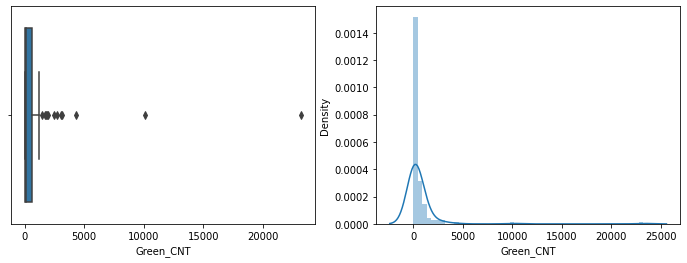

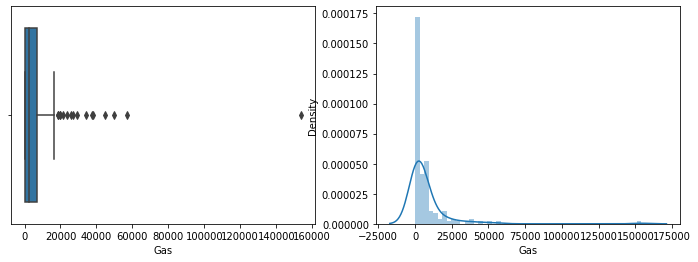

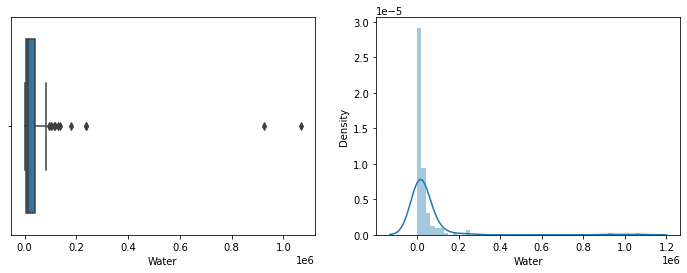

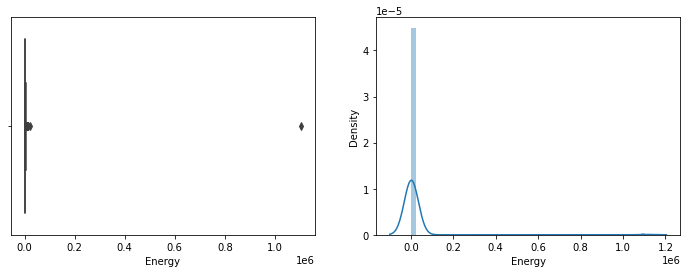

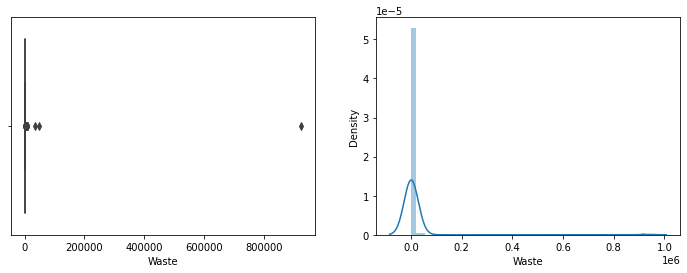

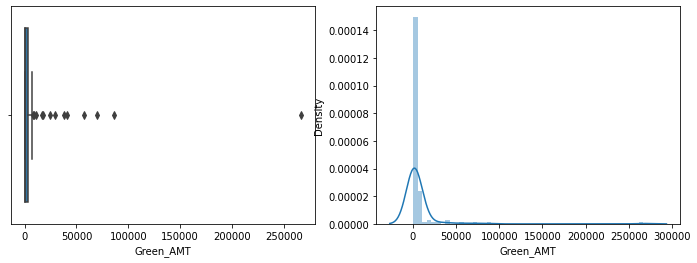

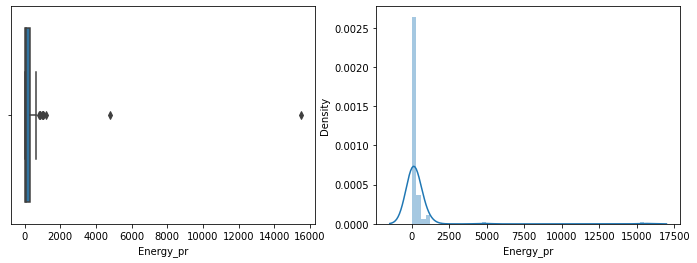

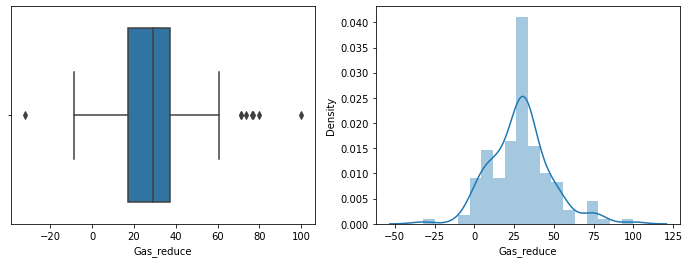

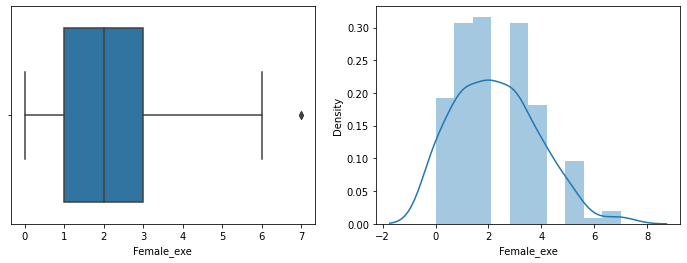

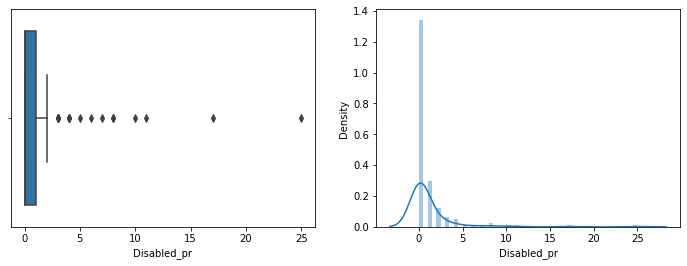

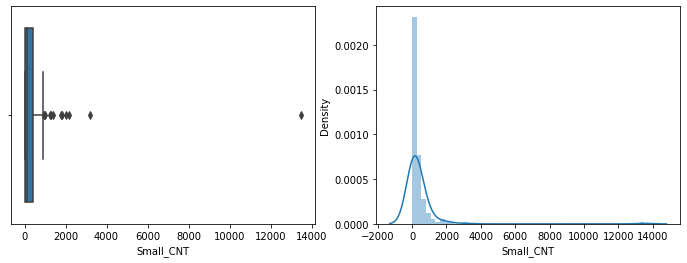

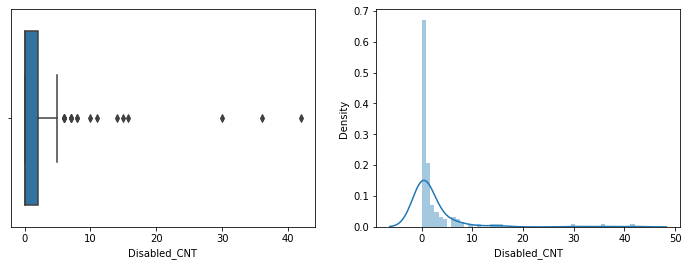

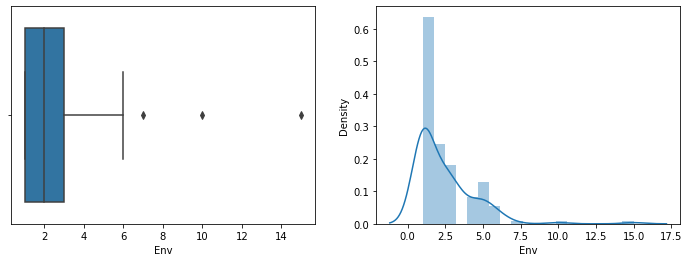

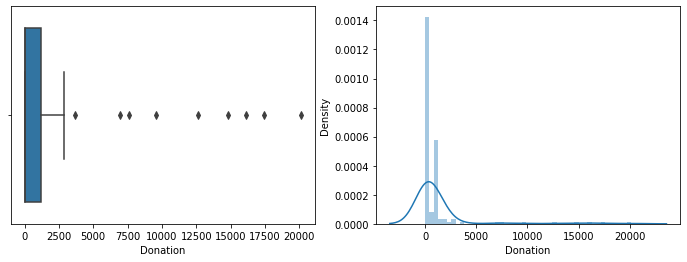

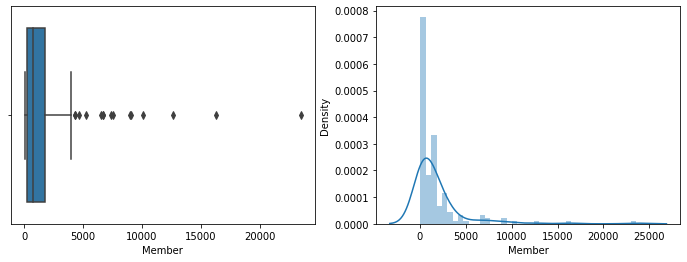

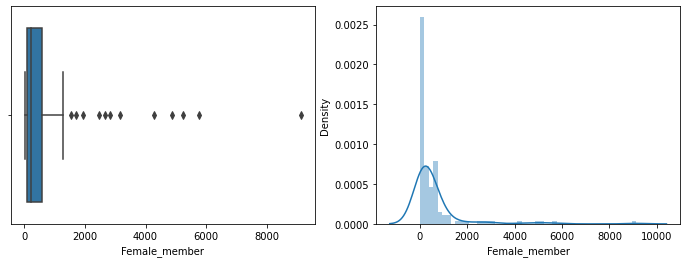

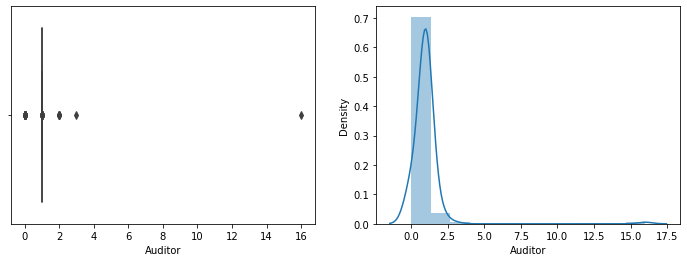

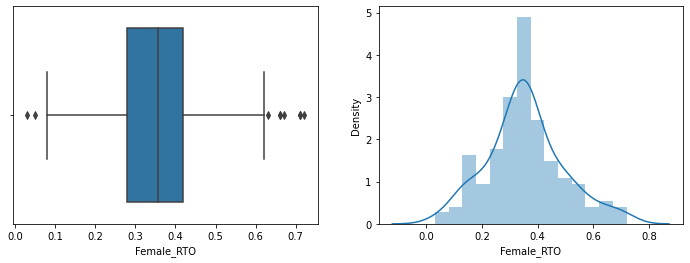

In [ ]:
# 시각화
columns = ['Green_CNT','Gas','Water','Energy','Waste','Green_AMT','Energy_pr','Gas_reduce','Female_exe',
                'Disabled_pr','Small_CNT','Disabled_CNT','Env','Donation','Member','Female_member','Auditor','Female_RTO']
show_hist(data,columns)

In [73]:
# EDA에서 확인한 이상치 치환
data = cut_outlier(data, ['Waste', 'Energy'])

### **Feature Engineering**

### **상관관계 확인**

In [74]:
# 상관관계 분석(전체 데이터)
corr_data = round(data.corr(),2)
corr_data

,Green_CNT,Gas,Water,Energy,Waste,Green_AMT,Energy_pr,Gas_reduce,Female_exe,Disabled_pr,Small_CNT,Disabled_CNT,Env,Donation,Member,Female_member,Auditor,Female_RTO,Target
Green_CNT,1.00,0.08,0.03,0.02,0.00,0.43,0.98,-0.05,0.02,-0.05,0.91,0.09,-0.00,0.05,0.14,0.10,-0.02,-0.02,0.39
Gas,0.08,1.00,0.11,0.07,0.01,0.04,0.06,-0.13,0.04,-0.07,0.09,0.02,0.11,0.04,0.12,0.16,0.02,0.02,0.08
Water,0.03,0.11,1.00,0.46,0.38,0.06,0.01,0.01,-0.13,-0.06,-0.02,0.08,0.07,0.02,0.07,0.03,-0.01,-0.13,0.11
Energy,0.02,0.07,0.46,1.00,0.72,0.14,-0.01,-0.04,-0.09,-0.05,-0.02,0.14,0.13,0.10,0.23,0.18,0.14,-0.12,0.19
Waste,0.00,0.01,0.38,0.72,1.00,0.09,-0.02,0.03,-0.06,-0.05,-0.02,0.13,0.16,0.09,0.10,0.00,0.09,-0.15,0.13
Green_AMT,0.43,0.04,0.06,0.14,0.09,1.00,0.35,-0.01,0.03,-0.07,0.39,0.08,0.20,0.40,0.30,0.24,-0.08,-0.05,0.75
Energy_pr,0.98,0.06,0.01,-0.01,-0.02,0.35,1.00,-0.04,0.03,-0.03,0.92,-0.00,-0.04,0.02,0.04,0.03,-0.01,0.01,0.28
Gas_reduce,-0.05,-0.13,0.01,-0.04,0.03,-0.01,-0.04,1.00,0.14,0.16,-0.05,0.03,0.03,0.03,-0.03,-0.02,0.06,0.16,-0.02
Female_exe,0.02,0.04,-0.13,-0.09,-0.06,0.03,0.03,0.14,1.00,0.08,0.07,0.03,0.09,0.01,-0.06,-0.04,0.07,0.23,0.01
Disabled_pr,-0.05,-0.07,-0.06,-0.05,-0.05,-0.07,-0.03,0.16,0.08,1.00,-0.05,-0.08,-0.07,0.02,-0.06,-0.03,-0.07,0.10,-0.09


In [75]:
# p-value
corr_p = corr_p(data)

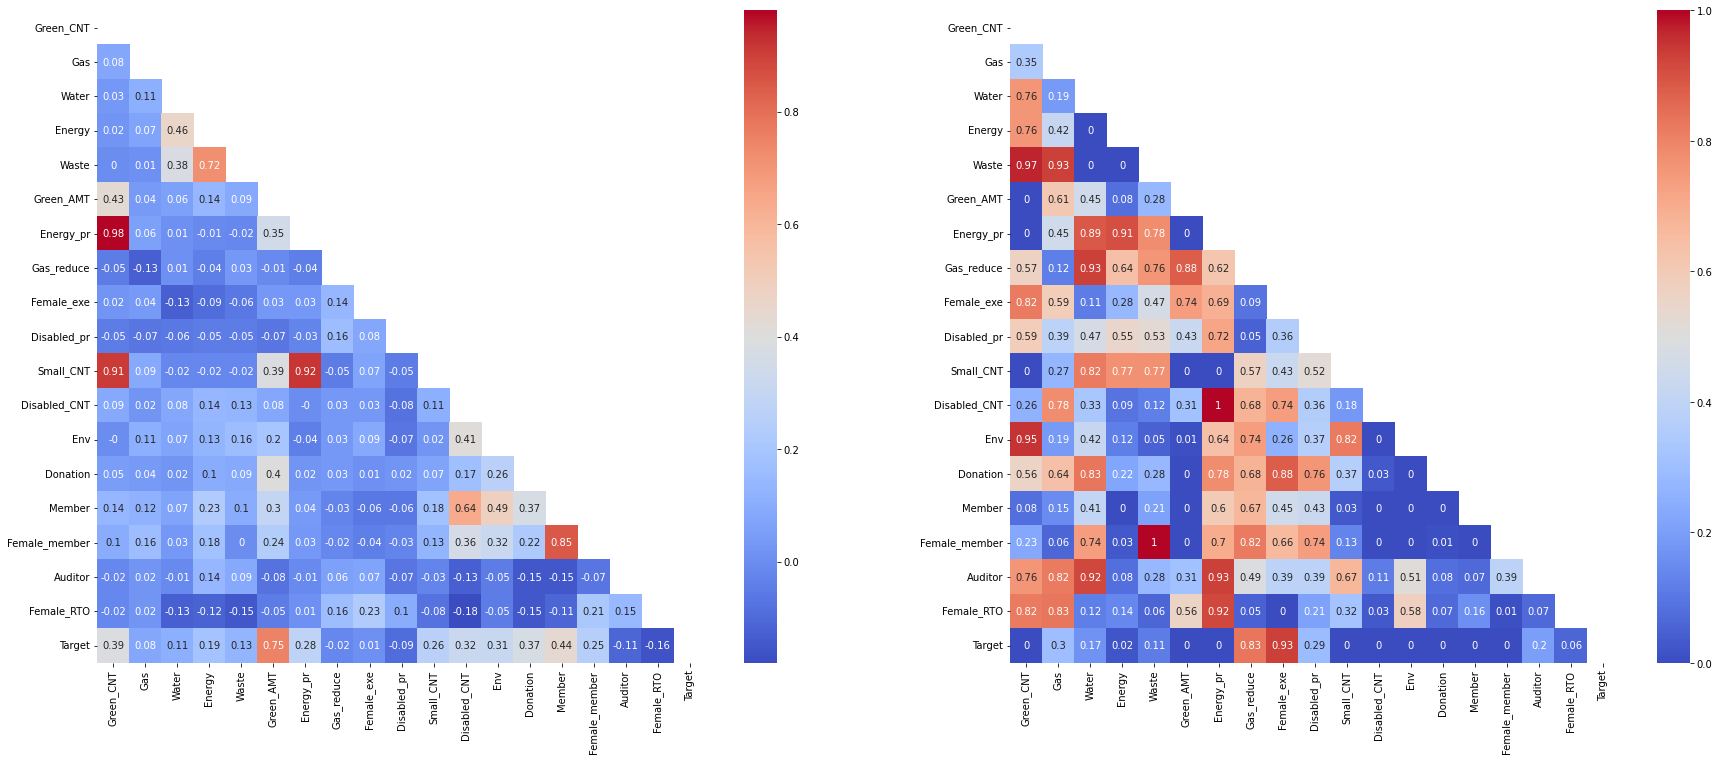

In [77]:
# 시각화
show_heatmap(corr_data, corr_p, 30,12)

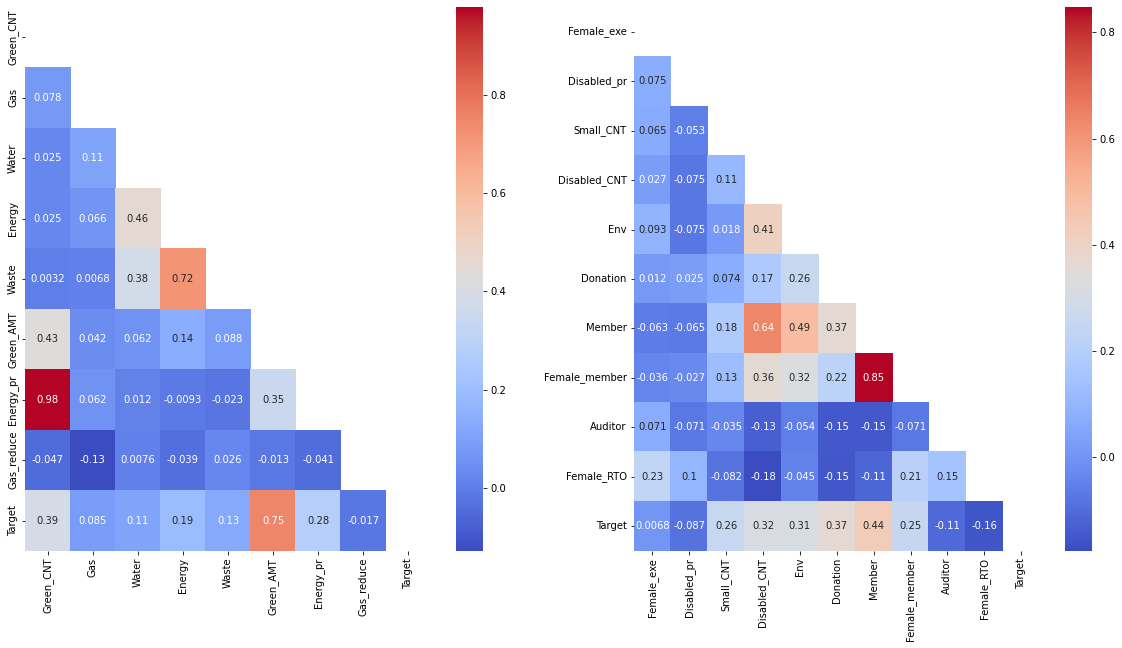

In [79]:
# 상관관계 분석(컬럼을 분류해보았을때)
env_column = ['Green_CNT','Gas','Water','Energy','Waste','Green_AMT','Energy_pr','Gas_reduce', 'Target']
hm_column = ['Female_exe','Disabled_pr','Small_CNT','Disabled_CNT','Env','Donation','Member','Female_member','Auditor','Female_RTO', 'Target']

env_corr = data[env_column].corr()
hm_corr = data[hm_column].corr()

show_heatmap(env_corr, hm_corr, 20,10)

### **OLS**

In [10]:
# OLS 회귀분석
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
from scipy import stats

y_data = data['Target']
X_data = data[['Green_CNT','Green_AMT', 'Small_CNT','Member','Female_member']]
# X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size = 0.2, random_state=2022)

art_model = sm.OLS(y_data, X_data)
art_result = art_model.fit()
art_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Target   R-squared (uncentered):                   0.757
Model:                            OLS   Adj. R-squared (uncentered):              0.748
Method:                 Least Squares   F-statistic:                              89.51
Date:                Thu, 17 Feb 2022   Prob (F-statistic):                    2.06e-42
Time:                        12:44:31   Log-Likelihood:                         -2183.1
No. Observations:                 149   AIC:                                      4376.
Df Residuals:                     144   BIC:                                      4391.
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Green_CNT       344.8788     55.288      6.238      0.000     235.597     454.161
Green_AMT        27.8859      2.208     12.629      0.000      23.521      32.250
Small_CNT      -609.6798     98.182     -6.210      0.000    -803.744    -415.615
Member          221.0780     28.991      7.626      0.000     163.776     278.380
Female_member  -363.3484     75.958     -4.784      0.000    -513.485    -213.211
==============================================================================
Omnibus:                      157.547   Durbin-Watson:                   1.931
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3697.776
Skew:                           3.859   Prob(JB):                         0.00
Kurtosis:                      26.153   Cond. No.                         59.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### **TreeRegressor**

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

y_data = data['Target']
X_data = data[['Small_CNT','Donation','Member','Female_member','Green_CNT','Green_AMT','Energy_pr']]

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size = 0.2, random_state=2022)

dt_rg = DecisionTreeRegressor(random_state=2022)
rf_rg = RandomForestRegressor(n_estimators=100, random_state=2022)
xgb_rg = XGBRegressor(n_esimators=100, random_state=2022)

dt_rg.fit(X_train, y_train)
rf_rg.fit(X_train, y_train)
xgb_rg.fit(X_train, y_train)

dt_pred = dt_rg.predict(X_test)
rf_pred = rf_rg.predict(X_test)
xgb_pred = xgb_rg.predict(X_test)

print('DT_r2_score : {0:.3f}'.format(r2_score(y_test,dt_pred)))
print('RF_r2_score : {0:.3f}'.format(r2_score(y_test,rf_pred)))
print('XGB_r2_score : {0:.3f}'.format(r2_score(y_test,xgb_pred)))

[08:14:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
DT_r2_score : 0.633
RF_r2_score : 0.764
XGB_r2_score : 0.640


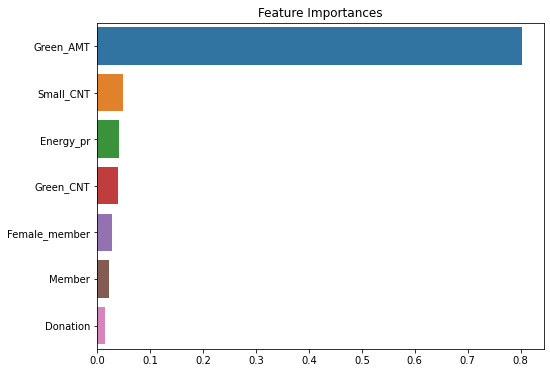

In [ ]:
# Feature Importance
ftr_importances = pd.Series(rf_rg.feature_importances_,index=X_train.columns)
ftr_top = ftr_importances.sort_values(ascending=False)

plt.figure(figsize=(8,6))
plt.title('Feature Importances')
sns.barplot(x=ftr_top, y=ftr_top.index)
plt.show()